In [1]:
from train import train , evaluate_model
import torch
from model import LivenessModel
from dataloader import CustomImageDataset
from torch.utils.data import DataLoader     
import os

d:\CAKE\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import argparse

def set_args():
    """
    Sets the script's arguments using argparse.

    Instead of parsing command-line arguments,
    we'll manually create an argument namespace with
    the default values. This simulates what would happen
    if the script was run from the command line with no
    additional arguments.
    """
    parser = argparse.ArgumentParser()
    parser.add_argument('--num_train_epochs', default=7, type=int, help='number of train epoched')
    parser.add_argument('--model', default='LivenessModel', type=str, help='model name')
    parser.add_argument('--output_dir', default='/output/', type=str, help='output directory')
    parser.add_argument('--train_batch_size', default=32, type=int, help='batch size in train phase')
    parser.add_argument('--dev_batch_size', default=32, type=int, help='batch size in dev phase')
    parser.add_argument('--projection_dim', default=768, type=int, help='classifier layer hidden size')
    parser.add_argument("--adam_epsilon", default=1e-8, type=float, help="Epsilon for Adam optimizer.")
    parser.add_argument("--optimizer_name", type=str, default='adam',help="use which optimizer to train the model.")
    parser.add_argument('--dropout_rate', default=0.1, type=float, help='dropout rate')
    parser.add_argument('--learning_rate', default=2e-4, type=float, help='learning rate')
    parser.add_argument('--num_classes',default=2,type=int,help='number of classes')
    parser.add_argument('--weight_decay',default=0.05,type=float,help='regularization')
    parser.add_argument('--lora',default=True,type=bool,help='train lora')
    parser.add_argument('--lora_alpha',default=32,type=int,help='lora alpha')
    parser.add_argument('--lora_r',default=64,type=int,help='lora rank')
    parser.add_argument('--pretrained',default=None,type=int,help='load pretrained model')

    args = parser.parse_args(args=[])
    return args

### Evaluation

Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 7,080,962 || all params: 93,661,442 || trainable%: 7.5602


`use_fast` is set to `True` but the image processor class does not have a fast version.  Falling back to the slow version.


Accuracy: 0.9535
F1 Score (Macro): 0.9535
Recall (Macro): 0.9535
Precision (Macro): 0.9535


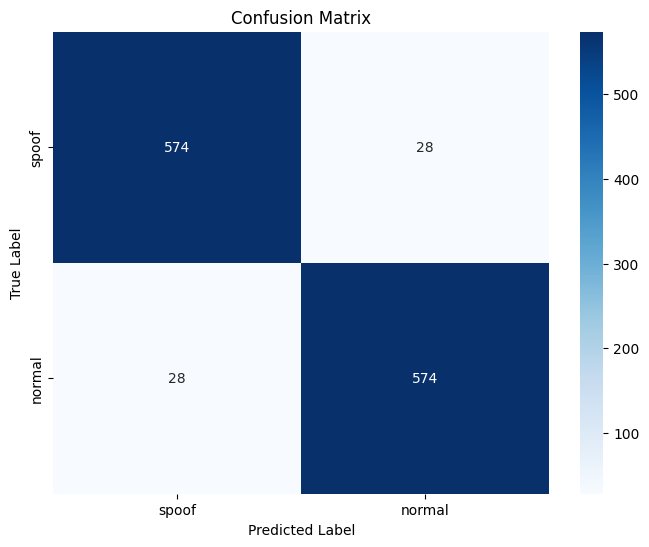

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Determine device (GPU if available)
checkpoint = torch.load("D:/CAKE/checkpoint/model_dino_lora.pt",
                        weights_only=False,  # Load only the weights
                        map_location=torch.device(device))  # Load checkpoint weights
model_dino_lora = LivenessModel(checkpoint['args']).to(device)  # Initialize model on device
model_dino_lora.load_state_dict(checkpoint['model_state_dict'])  # Load weights into the model

data_dir = 'D:/CAKE/dataset'  # **Change this to your actual dataset path**
train_dir = os.path.join(data_dir, "train")  # Path to training data
dev_dir = os.path.join(data_dir, "dev")  # Path to validation data
args = model_dino_lora.args
train_dataset = CustomImageDataset(train_dir, modelname=args.pretrained)  # Load training dataset
dev_dataset = CustomImageDataset(dev_dir, modelname=args.pretrained, dev=True)  # Load validation dataset

evaluate_model(model_dino_lora, device=device, testset=dev_dataset, args=args)  # Evaluate the model


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.8978
F1 Score (Macro): 0.8978
Recall (Macro): 0.8978
Precision (Macro): 0.8980


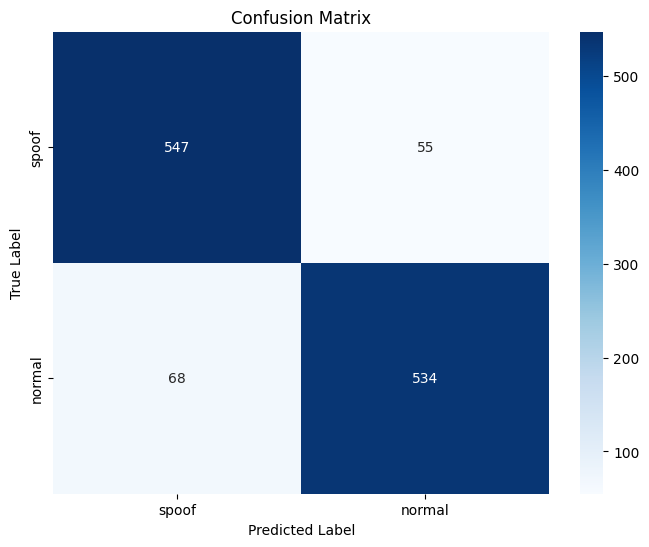

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Determine device (GPU if available)
checkpoint = torch.load("D:/CAKE/checkpoint/model_dino_transfer.pt",
                        weights_only=False,  # Load only the weights
                        map_location=torch.device(device))  # Load checkpoint weights
model_dino_transfer = LivenessModel(checkpoint['args']).to(device)  # Initialize model on device
model_dino_transfer.load_state_dict(checkpoint['model_state_dict'])  # Load weights into the model

data_dir = 'D:/CAKE/dataset'  # **Change this to your actual dataset path**
train_dir = os.path.join(data_dir, "train")  # Path to training data
dev_dir = os.path.join(data_dir, "dev")  # Path to validation data
args = model_dino_transfer.args
train_dataset = CustomImageDataset(train_dir, modelname=args.pretrained)  # Load training dataset
dev_dataset = CustomImageDataset(dev_dir, modelname=args.pretrained, dev=True)  # Load validation dataset

evaluate_model(model_dino_transfer, device=device, testset=dev_dataset, args=args)  # Evaluate the model


trainable params: 4,720,130 || all params: 90,518,786 || trainable%: 5.2145
Accuracy: 0.9460
F1 Score (Macro): 0.9460
Recall (Macro): 0.9460
Precision (Macro): 0.9466


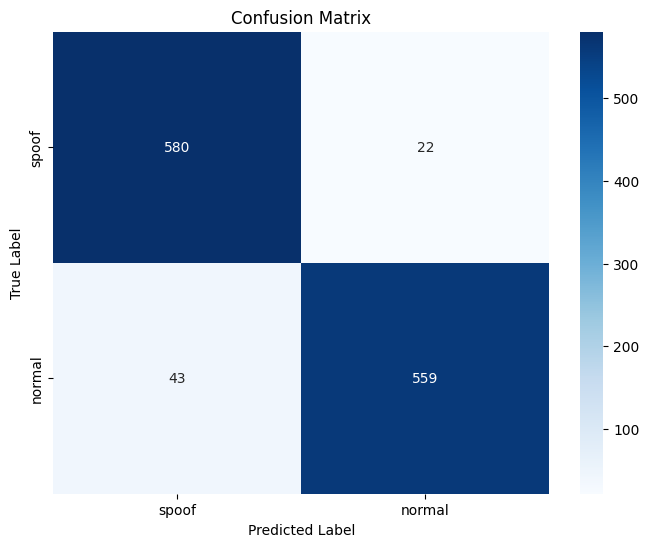

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Determine device (GPU if available)
checkpoint = torch.load("D:/CAKE/checkpoint/model_vit_lora.pt",
                        weights_only=False,  # Load only the weights
                        map_location=torch.device(device))  # Load checkpoint weights
model_vit_lora = LivenessModel(checkpoint['args']).to(device)  # Initialize model on device
model_vit_lora.load_state_dict(checkpoint['model_state_dict'])  # Load weights into the model

data_dir = 'D:/CAKE/dataset'  # **Change this to your actual dataset path**
train_dir = os.path.join(data_dir, "train")  # Path to training data
dev_dir = os.path.join(data_dir, "dev")  # Path to validation data
args = model_vit_lora.args
train_dataset = CustomImageDataset(train_dir, modelname=args.pretrained)  # Load training dataset
dev_dataset = CustomImageDataset(dev_dir, modelname=args.pretrained, dev=True)  # Load validation dataset

evaluate_model(model_vit_lora, device=device, testset=dev_dataset, args=args)  # Evaluate the model


Accuracy: 0.8937
F1 Score (Macro): 0.8937
Recall (Macro): 0.8937
Precision (Macro): 0.8937


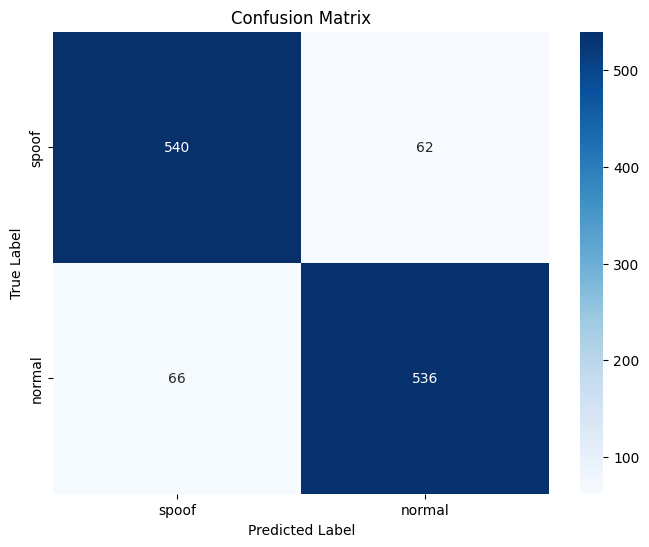

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Determine device (GPU if available)
checkpoint = torch.load("D:/CAKE/checkpoint/model_vit_transfer.pt",
                        weights_only=False,  # Load only the weights
                        map_location=torch.device(device))  # Load checkpoint weights
model_vit_transfer = LivenessModel(checkpoint['args']).to(device)  # Initialize model on device
model_vit_transfer.load_state_dict(checkpoint['model_state_dict'])  # Load weights into the model

data_dir = 'D:/CAKE/dataset'  # **Change this to your actual dataset path**
train_dir = os.path.join(data_dir, "train")  # Path to training data
dev_dir = os.path.join(data_dir, "dev")  # Path to validation data
args = model_vit_transfer.args
train_dataset = CustomImageDataset(train_dir, modelname=args.pretrained)  # Load training dataset
dev_dataset = CustomImageDataset(dev_dir, modelname=args.pretrained, dev=True)  # Load validation dataset

evaluate_model(model_vit_transfer, device=device, testset=dev_dataset, args=args)  # Evaluate the model

### Inference

In [ ]:
import torch
from model import LivenessModel, preprocessor
from inference import inference
import os

img_path = "YOUR_IMAHE_PATH"    # Change this to your actual image path
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Determine device (GPU if available)
checkpoint = torch.load("D:/CAKE/checkpoint/model_dino_lora.pt",
                        weights_only=False, # Load only the weights
                        map_location=torch.device(device))  # Load checkpoint weights
model = LivenessModel(checkpoint['args'])  # Initialize model on device

processor = preprocessor(model.args)  # Initialize processor with arguments

model.load_state_dict(checkpoint['model_state_dict'])  # Load weights into model

print("Inference: ", inference(model, processor,img_path, device))  # Perform inference on the image


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 7,080,962 || all params: 93,661,442 || trainable%: 7.5602


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Inference:  spoof


### Training

In [ ]:
from train import train , evaluate_model
import torch
from model import LivenessModel
from dataloader import CustomImageDataset   
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_dir = 'YOUR_DATASET_DIR'  # **Change this to your actual dataset path**  
train_dir = os.path.join(data_dir, "train")
dev_dir = os.path.join(data_dir, "dev")

args = set_args()
args.pretrained = "google/vit-base-patch16-224" # or "facebook/dino-vitbase16-224",...
args.projection_dim = 768 # depending on the pretrained model you choose
args.lora = True # or False, depending on your needs
args.lora_alpha = 32 # or any other value you prefer
args.lora_r = 64 # or any other value you prefer

model = LivenessModel(args).to(device)
train_dataset = CustomImageDataset(train_dir,modelname=args.pretrained)
dev_dataset = CustomImageDataset(dev_dir,modelname=args.pretrained,dev=True)

train(model, device=device, trainset=train_dataset, devset=dev_dataset, args=args)  # Train the model
evaluate_model(model, device=device, testset=dev_dataset, args=args)  # Evaluate the model

output_dir = "YOUR_OUTPUT_DIR"  # Specify your output directory
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist
torch.save({
    'args': args,
    'model_state_dict': model.state_dict()
}, os.path.join(output_dir, "model.pt"))  # Save the model state dictionary